In [1]:
%matplotlib inline
import math
import timeit
import matplotlib.pyplot as plt

**Time complexity** is the computational complexity that measures or estimates the units of time taken for running an algorithm.

Time complexity **IS**;
    - Proportion of the input/run time of an algorithm.

Time complexity is **NOT**;
    - The speed of the program.


## How to analyze time complexity?

Let's explain this using example functions.

#### Sum function
``` python
def sum(a, b):
    return a + b
    # ^      ^
    # 1      1    Tsum = 2units
```
By looking this example we can say;
    - operations like `+.-.*,/` are constant time operations.
    - assignments are constant time operations.
    
Most of the complexity analysis will simply ignore the constant time operations in an algorithm. In that case,
we can say that $Tsum = C$. This is the definition of a constant function. Means, for given `N` value return value is always `C`. We can say that this algorithm has $O(1)$ complexity (constant time).

---
#### Sum list function
``` python
def sum_list(A): # operations cost    note
    sum = 0      # 1          1     
    for n in A:  # 2          2(n+1)  +1 operation extra for false comparison.
        sum += n # 2          2
    return sum   # 1          1
```

$Tsum\_list = 1 + 2(n + 1) + 2 + 1 = 4n + 4$ units of operation. If we can recall a linear function definition, which is $mx + n$, we can see that $4n + 4$ is a **linear** function. We can say that this algorithm has $O(n)$ complexity (linear time).

------

#### Sum matrix function
``` python
def sum_matrix(M):    # operations cost
    sum = 0           # 1          1     
    for A in M:       # 2          2(n+1)
        for n in A:   # 2          2(n+1)
            sum += n  # 2          2
    return sum        # 1          1
```
$Tsum\_matrix = 1 + 2(n + 1) * 2(n + 1) + 2 + 1 = 4n^2 + 8n + 8$. Complexity of this algorithm is $O(n^2)$ (exponential time) I will explain how we arrived to this conclusion.

## Asymptotic notations

Assuming we have a algorithm which is defined as $T(n) = 6n^2 + 10n + 9$. To calculate the worst case scenario we can assume $n = \infty$. In that case, the all of the constants and multipliers become unimportant comparely to $n^2$. We can say that the worst case complexity of this algorithm is $O(n^2)$.

Let's conclude this topic with a concrete example, let's asssume we want to write a program that calculates if given number `N` is a **prime number**.

In [2]:
def is_prime_naive(N):
    """
    Check if a number is prime.
    
    Worst case, for a prime number it will iterate `N-3` times
    which will cause a time complexity of `O(N)`.
    """
                           # No.Operations    Cost
    for n in range(2, N):  # 2                n
        if N % n == 0:     # 1                1
            return False   # 1                1
    return True            # 1                1


def is_prime(N):
    """
    Check if a number is prime.

    If a we can not find an `n` to ` √N` than the number is prime.

    Worst case, for a prime number it will iterate ` √N-3` times
    which will cause a time complexity of `O(√N)`.
    """
                                            # No.Operations    Cost
    for n in range(2, round(math.sqrt(N))): # 2                √n
        if N % n == 0:                      # 1                1
            return False                    # 1                1
    return True                             # 1                1

## Benchmark

Let's make a small benchmark to test our time complexity estimation and visualize the complexity better.

In [3]:
funcs = ['is_prime_naive', 'is_prime']
orders_n = [11, 101, 1000003, 10000019, 100000007]
times_n = {f:[] for f in funcs}

for N in orders_n:
    for fn in funcs:
        times_n[fn].append(min(timeit.Timer('%s(N)' % fn,
                           'from __main__ import %s, N' % fn)
                            .repeat(repeat=3, number=1)) * 1000)

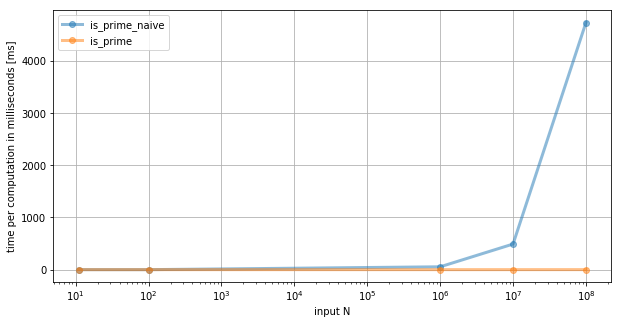

In [4]:
labels = [('is_prime_naive', 'is_prime_naive'),
          ('is_prime', 'is_prime')]
fig = plt.figure(figsize=(10, 5))

for lb in labels:
    plt.plot(orders_n, times_n[lb[0]],
            alpha=0.5, label=lb[1], marker='o', lw=3)
    
plt.xlabel('input N')
plt.xscale('log')

plt.ylabel('time per computation in milliseconds [ms]')
plt.legend(loc=2)
plt.grid()
plt.show()